In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils


Org image shape -->  (333, 500, 3)
After resizing shape -->  (200, 300, 3)
After Flattening shape -->  (60000, 3)


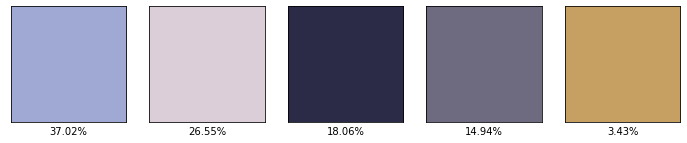

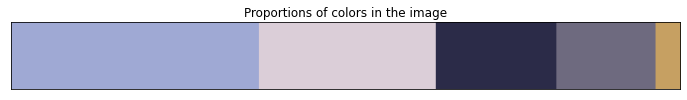

True

In [8]:
 
 clusters = 5 # try changing it

img = cv2.imread('/content/drive/MyDrive/House/house.jpeg')
org_img = img.copy()
print('Org image shape --> ',img.shape)

img = imutils.resize(img,height=200)
print('After resizing shape --> ',img.shape)

flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)

kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans.fit(flat_img)

dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1
 
plt.imshow(bar)
plt.xticks([])
plt.yticks([])

rows = 1000
cols = int((org_img.shape[0]/org_img.shape[1])*rows)
img = cv2.resize(org_img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)

final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20

plt.show()

#cv2.imshow('img',final)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('output.png',final)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
